# Dimension Reduction IV: Linear Discriminant Analysis (LDA)
### Implemented in Python

<i>Patrick White</i></br>
<i>Jan 06, 2025</i>

<img src="img/dr4.png" style="height: 450px; width:auto;">

# Outline

- Fisher’s Linear Discriminant
- Linear Discriminant Analysis
    - Assumptions
- Numpy Implementation
- Advantages and Limitations
- Scikit-Learn Implementation Details
    - Parameters
    - Attributes
    - Methods

# Fisher's Linear Discriminant

LDA is a generalization of Fisher's linear discriminant, developed by Ronald Fisher in 1936. For intuition, we will explore it first.

The goal of Fisher's linear discriminant is to find a linear combination of features that best separates two or more classes of objects. By maximizing the ratio of variance between the classes to the variance within the classes, it maximizes separability of the classes. The process is as follows:
1. Compute the mean vectors for each class.
2. Compute the within-class scatter matrix and between-class scatter matrix.
3. Solve for the projection vector that maximizes the ratio of between-class scatter to within-class scatter.

A scatter matrix is an unnormalized covariance matrix:

$\mathbf{S} = \sum_{i=1}^n (x_i - \mu)(x_i - \mu)^T$

There is an assumption that we model the data from each class with a Gaussian.

$p(\mathbf{x}_1) = \mathcal{N}(\mathbf{x}_1 | \mathbf{m}_1, \mathbf{S}_1)$

$p(\mathbf{x}_2) = \mathcal{N}(\mathbf{x}_2 | \mathbf{m}_2, \mathbf{S}_2)$

where $\mathbf{m}_i$ is the sample mean of class $i$, and $\mathbf{S}_i$ is the sample covariance.

The projections of the points from the two classes are then given by:

$y_1^n = \mathbf{w}^T \mathbf{x}_1^n$

$y_2^n = \mathbf{w}^T \mathbf{x}_2^n$

Because the projections are linear, the projected distributions are also Gaussian.

$p(y_1) = \mathcal{N}(y_1 | \mu_1, \sigma_1^2)$

$p(y_2) = \mathcal{N}(y_2 | \mu_2, \sigma_2^2)$

where: 
- $\mu_i = \mathbf{w}^T \mathbf{m}_i$
- $\sigma_i^2 = \mathbf{w}^T \mathbf{S}_1 \mathbf{w}$

We search for a projection $\mathbf{w}$ such that the projected distributions have minimal overlap, maximally separating the Gaussian means. In terms of projection $\mathbf{w}$, the objective equation is:

$F(\mathbf{w}) = \frac{ \mathbf{w}^T \mathbf{Aw} }{ \mathbf{w}^T \mathbf{Bw} }$

where:

- $\mathbf{A} = (\mathbf{m}_1 - \mathbf{m}_2) (\mathbf{m}_1 - \mathbf{m}_2)^T$
- $\mathbf{B} = \pi_1 \mathbf{S}_1 + \pi_2 \mathbf{S}_2$
- $\pi_i$ is the fraction of the dataset in class $i$

The optimal $\mathbf{w}$ can be found by differentiating the above with respect to $\mathbf{w}$.

$\frac{\partial}{\partial \mathbf{w}} \frac{ \mathbf{w}^T \mathbf{Aw} }{ \mathbf{w}^T \mathbf{Bw} } = \frac{2}{\mathbf{w B w})^2} = \left[ (\mathbf{w}^T \mathbf{Bw}) \mathbf{A w} - (\mathbf{w}^T \mathbf{A w}) \mathbf{Bw} \right]$

therefore the zero derivative requirement is:

$(\mathbf{w}^T \mathbf{Bw}) \mathbf{A w} = (\mathbf{w}^T \mathbf{A w}) \mathbf{B w}$

Multiplying by the inverse of $\mathbf{B}$, we have:

$\mathbf{B}^{-1} (\mathbf{m}_1 - \mathbf{m}_2) (\mathbf{m}_1 - \mathbf{m}_2)^T \mathbf{w} = \frac{ \mathbf{w}^T \mathbf{A w} }{ \mathbf{w}^T \mathbf{B w} } \mathbf{w}$

This means the optimal projection is explicitly given by:

$\mathbf{w} \propto \mathbf{B}^{-1} (\mathbf{m}_1 - \mathbf{m}_2)$

Although the proportionality factor depends on $\mathbf{w}$, we may take it to be constant since the objective function $F(\mathbf{w})$ of the above equation is invariant to rescaling of $\mathbf{w}$. We may therefore take:

$\mathbf{w} = k \mathbf{B}^{-1} (\mathbf{m}_1 - \mathbf{m}_2)$

It is common to rescale $\mathbf{w}$ to have unit length, $\mathbf{w}^T \mathbf{w} = 1$.

The denominator of Fisher's objective can become zero, and the objective ill-defined.

# Linear Discriminant Analysis (LDA)

As mentioned above, LDA is a generalization of Fisher's linear discriminant, extending it to handle multiple classes of data. LDA assumes that the data follow a multivariate normal distribution with class-specific parameters and estimates the prior probabilities, the means, and the covariance matrices of each class, which are assumed to equal. It computes the linear discriminant function, a linear combination of features that maximizes the ratio of between-class variance to within-class variance, and then projects the data onto the linear discriminant, obtaining the LDA score for each point based on position and distance from the discriminant function. This provides the likelihood of each data point belonging to each class. It classifies the data points based on the LDA score and the posterior probability of each class.

The process is as follows:

1. Compute the mean vectors for each class.
2. Compute the within-class scatter matrix and between-class scatter matrix.
3. Find the eigenvalues and eigenvectors that result from the combination of the within-class and between-class scatter matrices.
4. Choose the top eigenvectors that correspond to the largest eigenvalues to form a new subspace.

The approach to LDA is similar to that of PCA, but whereas PCA finds component axes that maximize the variance, LDA finds component axes that maximize class separability. 

We have two different scatter matrices, within-class scatter $S_W$ and between-class scatter $S_B$. The within-class scatter matrix describes separation of points within each class and the between-class scatter matrix describes the separation between classes.

The eigenvalue/eigenvector problem is then to compute eigenvalue and eigenvectors for $S_W^{-1} S_B$. Each eigenvector represents one axis of the LDA space, and the associated eigenvalue represents the robustness of this eigenvector. The robustness of the eigenvector reflects its ability to discriminate between different classes. Thus, the eigenvectors with the higher eigenvalues are used to construct a lower-dimensional space, projecting each point onto it.

## Assumptions

The assumptions of LDA include:
- That all predictor variables have the same variance (so we normally scale each variable to have the same mean and variance).
- That each class has the same covariance matrix
- That features are independent.
- That classes are linearly separable.
- A lack of outliers

# Numpy Implementation

Let's start with a 'from scratch' implementation before moving on to the <code>sklearn</code> one. The only thing I'll import from <code>sklearn</code> is some data to work with. We'll use the famous Iris dataset, because it has few classes, which will make it easier to visualize, and has entirely numerical features, so it will require no preprocessing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
X, y = data.data, data.target

n_features = X.shape[1]
class_labels = np.unique(y)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Next, we'll calculate $S_W$ and $S_B$.

In [2]:
SW = np.zeros((n_features, n_features))
SB = np.zeros((n_features, n_features))

mean_overall = np.mean(X, axis=0)

for c in class_labels:
    X_c = X[y == c]
    mean_c = np.mean(X_c, axis=0)
    SW += (X_c - mean_c).T.dot((X_c - mean_c))

    n_c = X_c.shape[0]
    mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
    SB += n_c * (mean_diff).dot(mean_diff.T)

Then, solve the eigenvectors and eigenvalues problem.

In [3]:
n_components = 2

A = np.linalg.inv(SW).dot(SB)

# Get eigenvalues and eigenvectors of SW^-1 * SB
eigenvalues, eigenvectors = np.linalg.eig(A)

# sort eigenvalues high to low
eigenvectors = eigenvectors.T
idxs = np.argsort(abs(eigenvalues))[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]

# store first n eigenvectors
linear_discriminants = eigenvectors[0 : n_components]

And finally, project the data onto the lower-dimensional (2D) space.

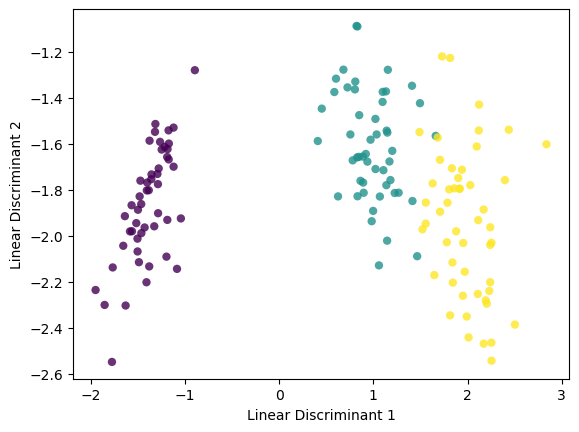

In [4]:
X_projected = np.dot(X, linear_discriminants.T)
x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8
)

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.show()

# Advantages and Limitations

Although an advantage of unsupervised dimension reduction techniques is that a target feature need not be chosen, an advantage of LDA, given a target variable, is the ability to target it and optimize class-separability. The linear combinations of LDA are easy to interpret compared to non-linear transformations, and linear methods are generally less compute-intensive than non-linear methods.

However, the linear assumption presumes that the relationships between features are linear, and furthermore, we have an assumption of normality. LDA assumes all classes have the same covariance matrix, and is sensitive to outliers because it relies on mean and covariance estimates. Scalability for large datasets can be accomplished by computing the covariance matrix and solving the eigenvalue problem.

# Scikit-Learn Implementation Details

<code>sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)</code>

## Parameters

- <code>solver</code> (default='svd'): solver to use; possibilities include 'svd', which is recommended for a large number of features (as it gets to skip calculation of the covariance matrix), 'lsqr', a least-squares based implementation, and 'eigen', an eigendecomposition based solution.

- <code>n_components</code> (default='all'): number of components for dimensionality reduction.

## Attributes

- <code>coef_</code>: weight vectors.
- <code>intercept_</code>: intercept term.
- <code>covariance_</code>: weighted within-class covariance matrix.
- <code>explained_variance_ratio_</code>: percent of variances explained by each of the selected components.
- <code>n_features_in_</code>: number of features seen during training.

## Methods

- <code>fit</code>: fit an instance of the model to the data.
- <code>fit_transform</code>: fit an instance of the model to the data, and apply the dimensionality reduction to the data.
- <code>predict</code>: predict class labels for samples in the data.
- <code>predict_proba</code>: estimate probability.

# References

- Loebler, P. (n.d.). LDA (Linear Discriminant Analysis) In Python. Python Engineer. https://www.python-engineer.com/courses/mlfromscratch/14-lda/

- Tharwat, A., Gaber, T., Ibrahim, A., & Hassanien, A. E. (2017). Linear Discriminant Analysis: A Detailed Tutorial. AI Communications. https://doi.org/10.3233/AIC-170729

- Murphy, K. P. (2022). Probabilistic Machine Learning (2nd ed.). MIT Press. https://probml.github.io/pml-book/book1.html

- (2021, May 2). Linear Discriminant Analysis in R. R-Bloggers. https://www.r-bloggers.com/2021/05/linear-discriminant-analysis-in-r/

- Hastie, T., Tibshirani, R., & Friedman, J. (2017). Elements of Statistical Learning (2nd ed.). Springer. https://www.researchgate.net/publication/225734295_The_Elements_of_Statistical_Learning_Data_Mining_Inference_and_Prediction

- Scikit-Learn (n.d.). Linear and Quadratic Discriminant Analysis. Scikit-Learn User Guide. https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda

- Khadka, N. (n.d.). Ultimate Guide to Linear Discriminant Analysis (LDA). https://dataaspirant.com/linear-discriminant-analysis/